Often times we need to compare stock performance between each other or against the index during specific time interval. Since different stocks have different price values, 
the comparison is done on relative basis, where all the prices are normalized to 1$ at the first day of the time interval we are interested in.

Very useful for comparing not only stocks between each other, but also major indexes (or ETFs) in the world. This way we can for example compare how is USA technology ETF (QQQ) doing against Chinese tech ETF (CHIK) for example.

In this specific example we are comparing so called FAANG stocks (Facebook, Amazon, Apple, Netfix and Google ['FB','AMZN','AAPL','NFLX','GOOG']) to S&P500 ETF (SPY). 


In [12]:
#optional installations: 
#!pip install yfinance --upgrade --no-cache-dir
#!pip3 install pandas_datareader
#!pip3 install pandas --upgrade

# better display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ___library_import_statements___
import pandas as pd

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

#newest yahoo API 
import yfinance as yahoo_finance

%matplotlib inline

Function definitions:

In [13]:
def f_plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # takes a dataframe, columns (list) that we want to print and range of rows
    # note: df.ix is deprecated now
    f_plot_data(df.loc[start_index:end_index])        
    # use df.loc not df.iloc since we use datetime as index

def f_get_data(symbols, dates, start_time, today):
    """Read stock data (adjusted close) for given symbols from yahoo finance"""
    df = pd.DataFrame(index=dates)
    print(df.head())
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
    # yahoo gives only daily historical data, more granular data stream is hard to get for free
        connected = False
        while not connected:
            try:
                ticker_df = web.get_data_yahoo(symbol, start=start_time, end=today)
                connected = True
                print('connected to yahoo')
            except Exception as e:
                print("type error, something is wrong: " + str(e))
                time.sleep( 10 )
                pass   
        
        # reset index from dates to index numbers
        # print(ticker_df.head(2))
        #       Date        High                                                          
        # 2017-01-03  128.190002    
        # 2017-01-04  130.169998 
        ticker_df = ticker_df.reset_index()
        # print(ticker_df.head(2))
        #         Date        High  
        # 0 2017-01-03  128.190002   
        # 1 2017-01-04  130.169998
        ticker_df.set_index('Date', inplace=True, drop=False) 
        
        df_temp = ticker_df[['Date','Adj Close']]
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp[symbol])
        
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
            
    return df

def f_normalize_data(df):
    """normalizes stock data in respect to price in day 1, 
    this way price on the first day starts at 1$ for any given stock"""
    #return df/df.ix[0,:]      # deprecated option
    return df/df.iloc[0,:]     # use df.iloc not df.loc since index is number
    
def f_plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    
    ax = df.plot(title=title, fontsize=12, figsize=(20, 10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    
    #plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
    plt.title('Relative price change')
    plt.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.style.use('bmh')
    plt.grid(True)
    plt.show()

def f_run():
    # Define a date range
    start_time = datetime.datetime(2017, 1, 1)
    # end_time = datetime.datetime(2018, 6, 20)
    today = datetime.datetime.now().date().isoformat()
    dates = pd.date_range(start_time, today)

    # Choose stock symbols to read
    symbols = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']  
    # SPY will be added in f_get_data() function automatically
    
    # Get stock data
    df = f_get_data(symbols, dates, start_time, today)
    df = f_normalize_data(df)
    
    # Slice and plot
    f_plot_selected(df, ['SPY', 'FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG'], start_time, today)

Final evaluation:

Empty DataFrame
Columns: []
Index: [2017-01-01 00:00:00, 2017-01-02 00:00:00, 2017-01-03 00:00:00, 2017-01-04 00:00:00, 2017-01-05 00:00:00]
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo


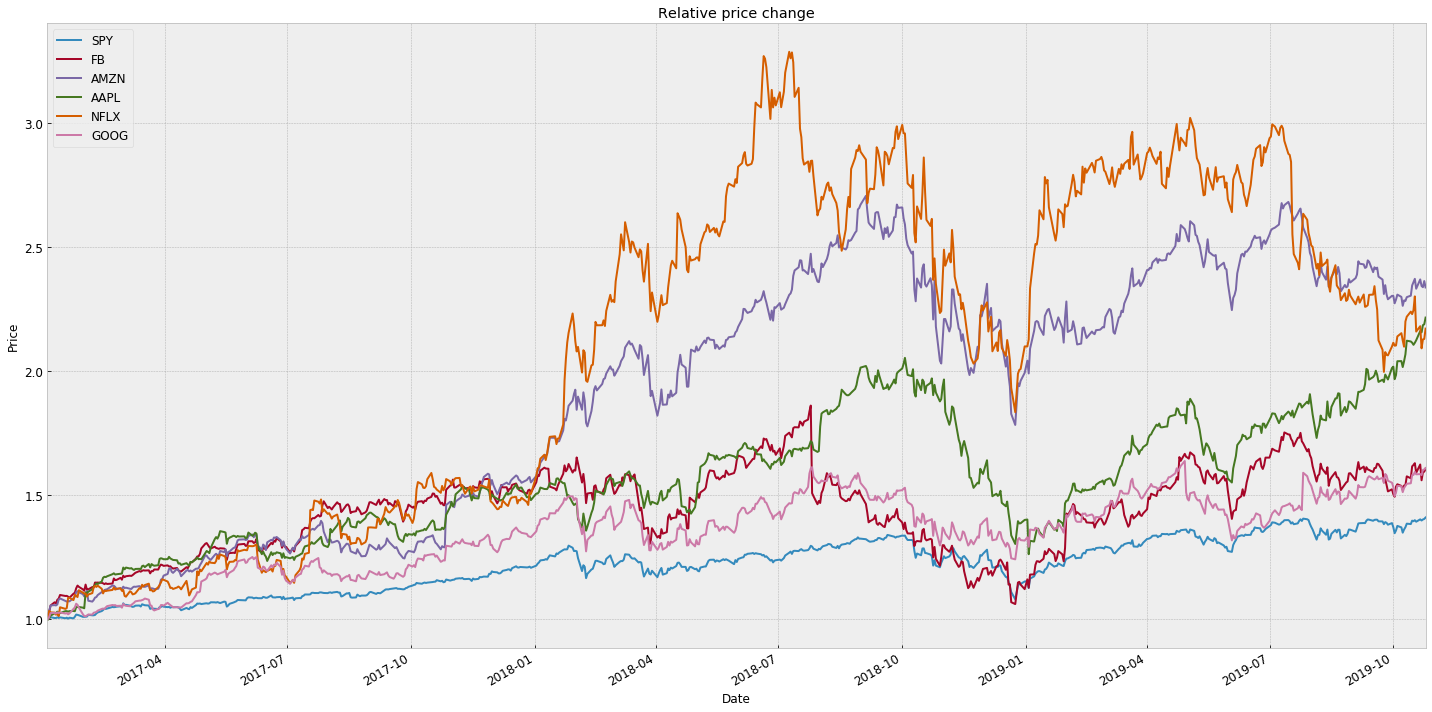

In [14]:
if __name__ == "__main__":
    f_run()

#### Source:
free Udacity course: Machine Learning for Trading, Lesson 3    
https://eu.udacity.com/course/machine-learning-for-trading--ud501
code has been modified extensively    


#### Git repo:
git clone https://github.com/tristcoil/plot-multiple-stocks.git